Thanks to [Reference](https://texthero.org)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spooky-author-identification/train.zip
/kaggle/input/spooky-author-identification/sample_submission.zip
/kaggle/input/spooky-author-identification/test.zip


In [2]:
from zipfile import ZipFile

In [6]:
zip = ZipFile('/kaggle/input/spooky-author-identification/train.zip')
zip.extractall()

In [7]:
!ls

__notebook_source__.ipynb  train.csv


In [8]:
df = pd.read_csv('train.csv')

In [9]:
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [13]:
!pip install texthero

     |████████████████████████████████| 1.4 MB 275 kB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434675 sha256=761f8b786eb2119bbe0a86e28e2ee1e8c65198e87d5cf2975362334c39096b34
  Stored in directory: /root/.cache/pip/wheels/45/6c/46/a1865e7ba706b3817f5d1b2ff7ce8996aabdd0d03d47ba0266
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

preprocessing 0.1.13 requires nltk==3.2.4, but you'll have nltk 3.5 which is incompatible.


In [14]:
from texthero import preprocessing
df['clean_text'] = preprocessing.clean(df['text'])

In [17]:
preprocessing.get_default_pipeline()

[<function texthero.preprocessing.fillna(input: pandas.core.series.Series) -> pandas.core.series.Series>,
 <function texthero.preprocessing.lowercase(input: pandas.core.series.Series) -> pandas.core.series.Series>,
 <function texthero.preprocessing.remove_digits(input: pandas.core.series.Series, only_blocks=True) -> pandas.core.series.Series>,
 <function texthero.preprocessing.remove_punctuation(input: pandas.core.series.Series) -> pandas.core.series.Series>,
 <function texthero.preprocessing.remove_diacritics(input: pandas.core.series.Series) -> pandas.core.series.Series>,
 <function texthero.preprocessing.remove_stopwords(input: pandas.core.series.Series, stopwords: Union[Set[str], NoneType] = None, remove_str_numbers=False) -> pandas.core.series.Series>,
 <function texthero.preprocessing.remove_whitespace(input: pandas.core.series.Series) -> pandas.core.series.Series>]

There are 7 text-preprocessing methods:
- fillna()
- lowercase
- remove_digits
- remove_punctuation
- remove_diacritics(Accent)
- remove_stopwords
- remove_whitespace

And, we can make custom preprocessing so please see the below codes.

```python
custom = [preprocessing.fillna, preprocessing.lowercase] 
df['clean_text'] = preprocessing.clean(df['text'], custom)
```

In [19]:
from texthero import nlp

In [29]:
string = pd.Series('Donald Trump said he was "medication free" and revealed more details of his fight with Covid-19 in a televised interview aired Friday, one week after he was hospitalized with the virus.')

nlp offers some functions: named_entities and noun_chunks

In [30]:
nlp.named_entities(string)[0]

[('Donald Trump', 'PERSON', 0, 12),
 ('Friday', 'DATE', 127, 133),
 ('one week', 'DATE', 135, 143)]

In [31]:
nlp.noun_chunks(string)[0]

[('Donald Trump', 'NP', 0, 12),
 ('he', 'NP', 18, 20),
 ('more details', 'NP', 56, 68),
 ('his fight', 'NP', 72, 81),
 ('Covid-19', 'NP', 87, 95),
 ('a televised interview', 'NP', 99, 120),
 ('he', 'NP', 150, 152),
 ('the virus', 'NP', 175, 184)]

# Visualization Technique
There are some awesome visualization methods in texthero that you can use easily.

In [33]:
from texthero import representation, visualization

In [36]:
df['pca'] = (
    df['text']
    .pipe(preprocessing.clean)
    .pipe(representation.tfidf, max_features=1000)
    .pipe(representation.pca)
)

visualization.scatterplot(df, 'pca', color='author', title="Spooky Author Identification")

In [37]:
df['tfidf'] = (df['text'].pipe(preprocessing.clean).pipe(representation.tfidf, max_features=1000))

df['labels'] = (df['tfidf'].pipe(representation.kmeans, n_clusters=3).astype(str))

df['pca'] = df['tfidf'].pipe(representation.pca)

visualization.scatterplot(df, 'pca', color='labels', title="Spooky Author Identification using K-means")

/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:934: FutureWarning:

'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect

/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.



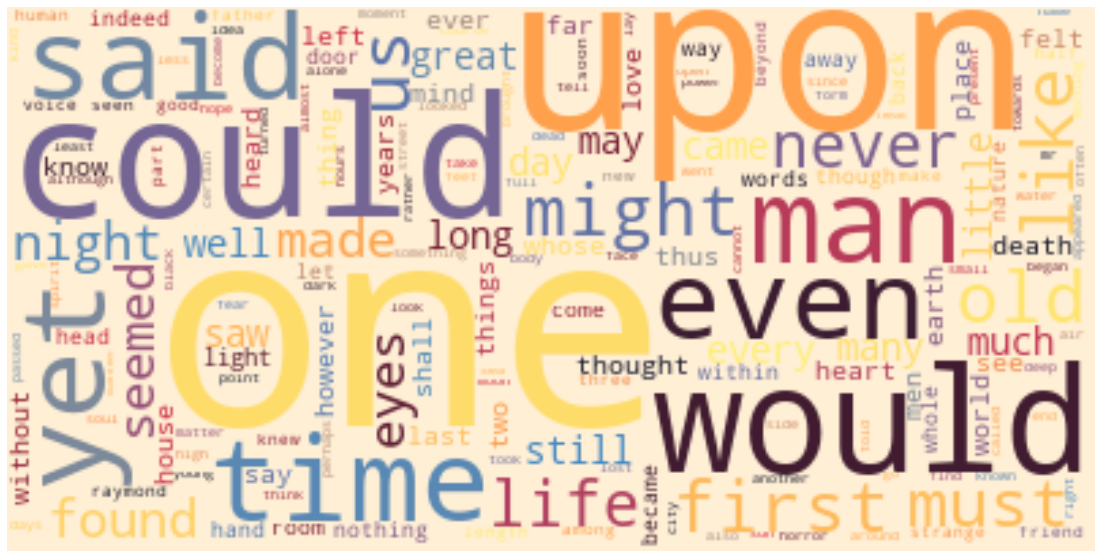

In [38]:
visualization.wordcloud(df['clean_text'])

In [39]:
visualization.top_words(df['clean_text']).head(5)

one      1623
upon     1411
could    1316
would    1241
man       779
Name: clean_text, dtype: int64

I heard that TextHero is still improved but we can use it for quick preprocessing and TextHero has powerful functions.